##### <h1 id="aa" align="center" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;"> КЛАСТЕРИЗАЦИЯ  И КЛАССИФИКАЦИЯ ПИНГВИНОВ</h1> 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score, calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### <h1 id="aa" align="center" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">Загрузка данных</h1> 

In [4]:
_df = pd.read_csv('penguins_lter.csv')
df = pd.read_csv('penguins_size.csv')

In [5]:
# Просматриваем наши файл 

In [6]:
_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [7]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


После чщательного анализа данных я сделал вывод что, датасет penguins_lter имеет лишние и не нужные данные, а penguins_size имеет все что нам необходимо, поэтому было принято решение оставить его.

Признаки:


- species – вид
- island – остров на котором обитают
- culmen_length_mm – длина клюва
- culmen_depth_mm – глубина клюва
- flipper_length_mm – длина плавника
- body_mass_g – масса в граммах
- sex – гендер

Целевой (искомый) признак:
- species – вид

#### Описание данных

### <h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">1. Предобработка данных</h1> 

In [12]:
# информация о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Посмотрим какие данные находятся в наших признаках

In [15]:
df['species'].value_counts() # тут все хорошо

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [16]:
df['island'].value_counts() # тут все хорошо

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [17]:
df['culmen_length_mm'].value_counts() # тут все хорошо

culmen_length_mm
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: count, Length: 164, dtype: int64

In [18]:
df['culmen_depth_mm'].value_counts() # тут все хорошо

culmen_depth_mm
17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: count, Length: 80, dtype: int64

In [19]:
df['flipper_length_mm'].value_counts() # тут все хорошо

flipper_length_mm
190.0    22
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
216.0     8
212.0     7
186.0     7
181.0     7
189.0     7
230.0     7
192.0     7
184.0     7
199.0     6
213.0     6
188.0     6
214.0     6
217.0     6
222.0     6
201.0     6
219.0     5
209.0     5
218.0     5
221.0     5
203.0     5
194.0     5
180.0     5
178.0     4
225.0     4
228.0     4
202.0     4
200.0     4
182.0     3
224.0     3
205.0     3
229.0     2
183.0     2
207.0     2
223.0     2
211.0     2
231.0     1
206.0     1
174.0     1
172.0     1
179.0     1
176.0     1
226.0     1
Name: count, dtype: int64

In [20]:
df['body_mass_g'].value_counts() # тут все хорошо

body_mass_g
3800.0    12
3700.0    11
3900.0    10
3950.0    10
3550.0     9
          ..
4475.0     1
3975.0     1
3575.0     1
3850.0     1
5750.0     1
Name: count, Length: 94, dtype: int64

In [21]:
df['sex'].value_counts() # тут обнаружена анамалия

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [22]:
df = df[df['sex'] != '.']

In [23]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке species = 0
Кол-во пропусков в колонке island = 0
Кол-во пропусков в колонке culmen_length_mm = 2
Кол-во пропусков в колонке culmen_depth_mm = 2
Кол-во пропусков в колонке flipper_length_mm = 2
Кол-во пропусков в колонке body_mass_g = 2
Кол-во пропусков в колонке sex = 10


In [24]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8             17.1              186.0   
11   Adelie  Torgersen              37.8             17.3              180.0   
47   Adelie      Dream              37.5             18.9              179.0   
246  Gentoo     Biscoe              44.5             14.3              216.0   
286  Gentoo     Biscoe              46.2             14.4              214.0   
324  Gentoo     Biscoe              47.3             13.8              216.0   
339  Gentoo     Biscoe               NaN              NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  

Судя по данным 2 строки имеют пропуски сразу по нескольким параметрам, их можно удалить, а остальных только гендер, его можно будет заменить.

In [26]:
df = df.dropna(subset=['culmen_length_mm'])
df = df.reset_index(drop=True)

In [27]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке species = 0
Кол-во пропусков в колонке island = 0
Кол-во пропусков в колонке culmen_length_mm = 0
Кол-во пропусков в колонке culmen_depth_mm = 0
Кол-во пропусков в колонке flipper_length_mm = 0
Кол-во пропусков в колонке body_mass_g = 0
Кол-во пропусков в колонке sex = 8


In [28]:
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [29]:
mode_value = df['sex'].mode()[0]
df['sex'] = df['sex'].fillna(mode_value)

In [30]:
df.duplicated().sum()

0

Для того чтобы данные были более корректными и понятными для машины, меняем его на цифровое значение.

In [32]:
species = {'Adelie': 1, 'Gentoo': 2, 'Chinstrap': 3}
df['species'] = df['species'].replace(species)

In [33]:
df['species'].value_counts()

species
1    151
2    122
3     68
Name: count, dtype: int64

In [34]:
island = {'Biscoe': 1, 'Dream': 2, 'Torgersen': 3}
df['island'] = df['island'].replace(island)

In [35]:
df['island'].value_counts()

island
1    166
2    124
3     51
Name: count, dtype: int64

In [36]:
sex = {'MALE': 1, 'FEMALE': 2}
df['sex'] = df['sex'].replace(sex)

In [37]:
df['sex'].value_counts()

sex
1    176
2    165
Name: count, dtype: int64

### <h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">2. Визуализация</h1> 

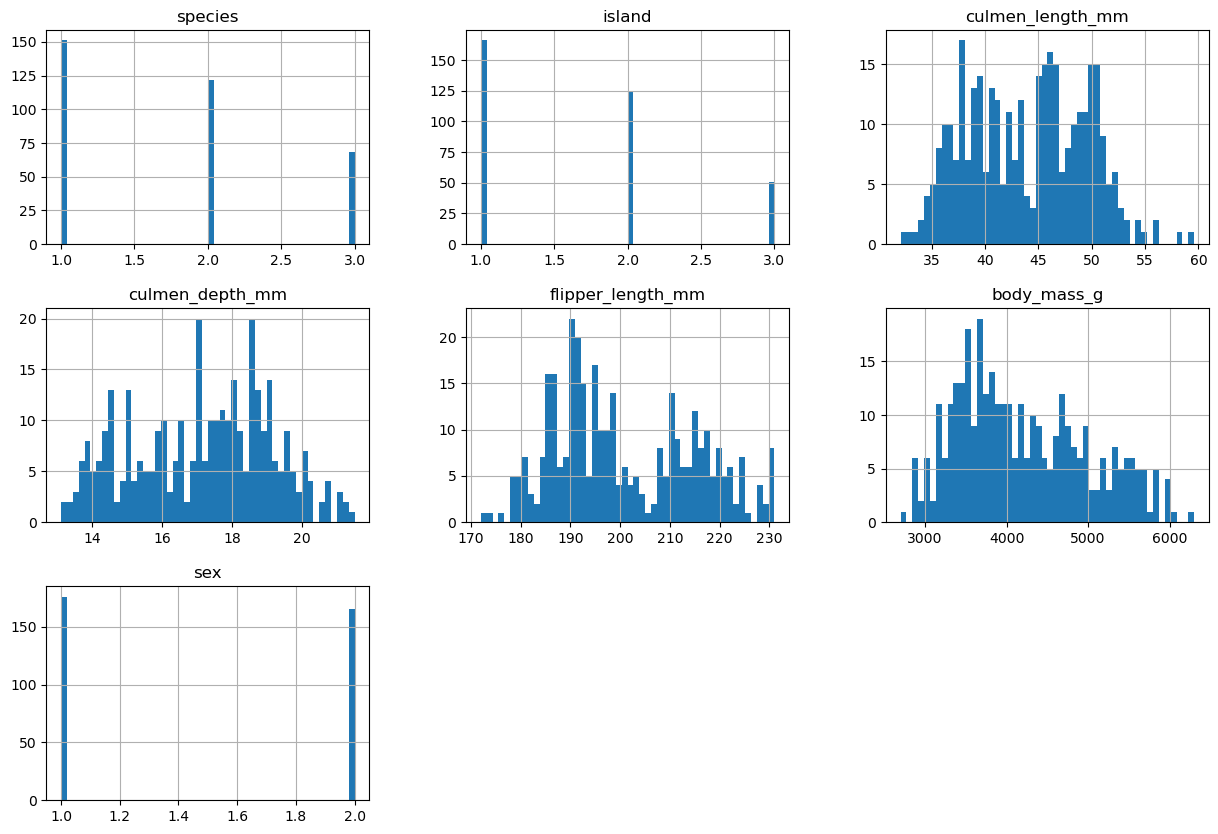

In [39]:
df.hist(figsize = (15,10), bins = 50);

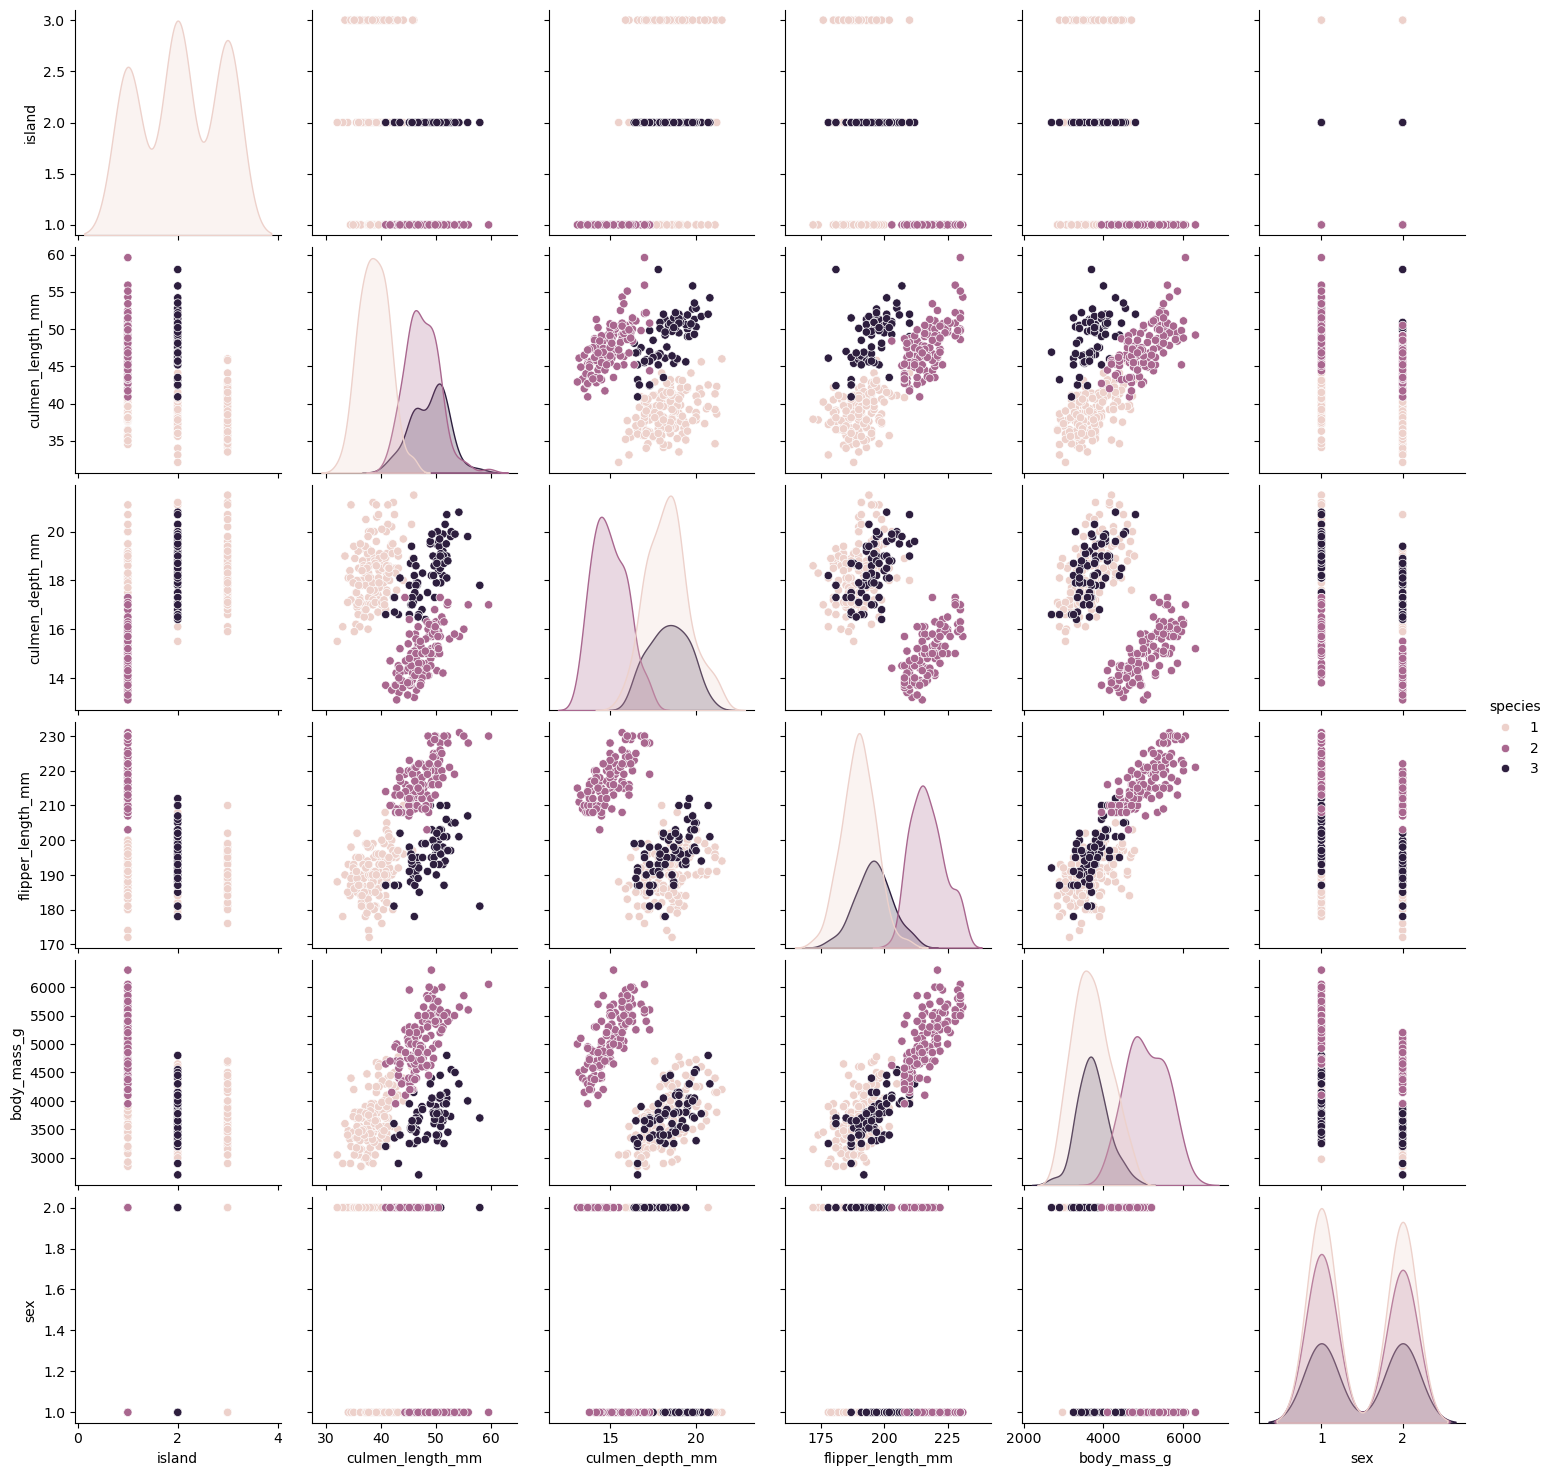

In [40]:
sns.pairplot(df[['species','island','culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']], hue = 'species')

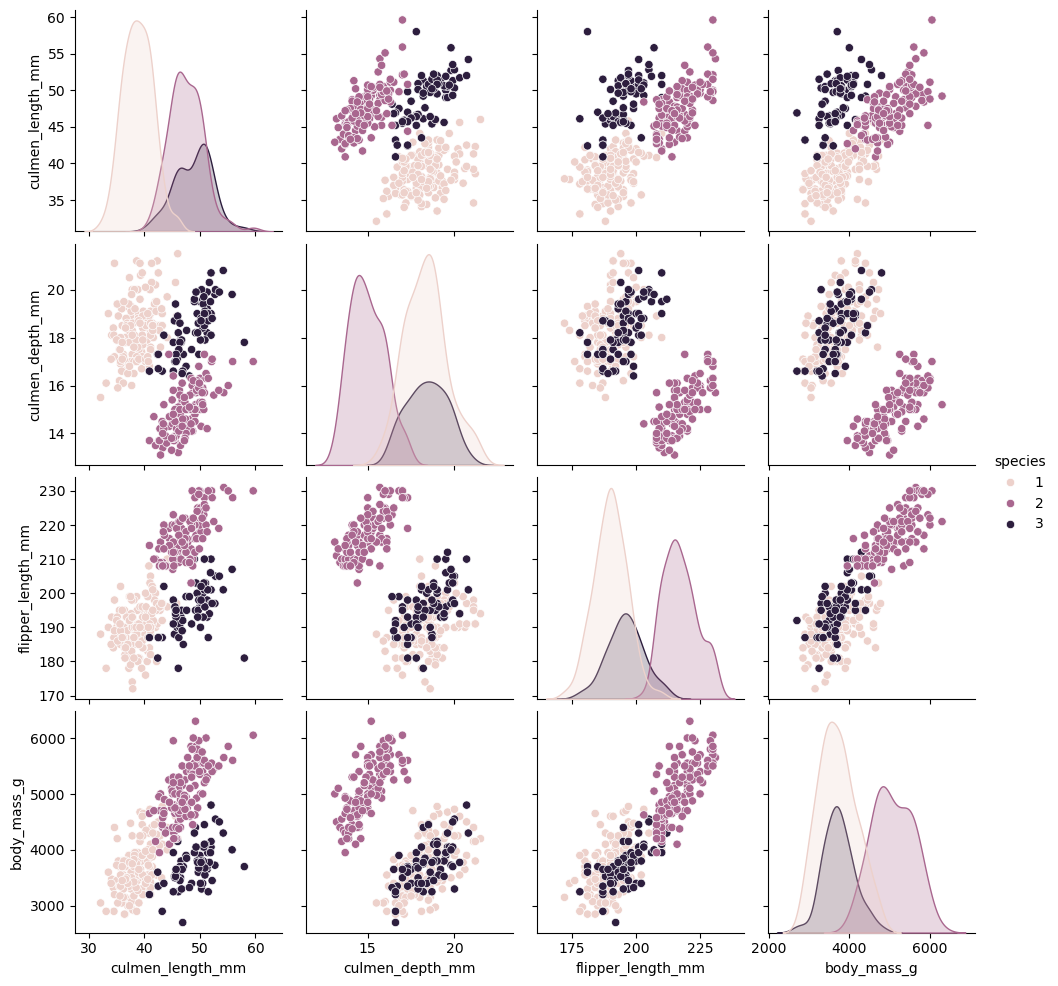

In [41]:
sns.pairplot(df[['species', 'culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], hue = 'species')

In [42]:
corr = df[['species','island','culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].corr()
corr

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.185900,0.779887,-0.182575,0.357143,0.209180,0.008925
island,-0.185900,1.000000,-0.353802,0.570213,-0.564532,-0.560529,-0.002880
culmen_length_mm,0.779887,-0.353802,1.000000,-0.235015,0.657102,0.595476,-0.323358
culmen_depth_mm,-0.182575,0.570213,-0.235015,1.000000,-0.582964,-0.470963,-0.358191
flipper_length_mm,0.357143,-0.564532,0.657102,-0.582964,1.000000,0.870956,-0.241768
body_mass_g,0.209180,-0.560529,0.595476,-0.470963,0.870956,1.000000,-0.407915
sex,0.008925,-0.002880,-0.323358,-0.358191,-0.241768,-0.407915,1.000000


<Axes: >

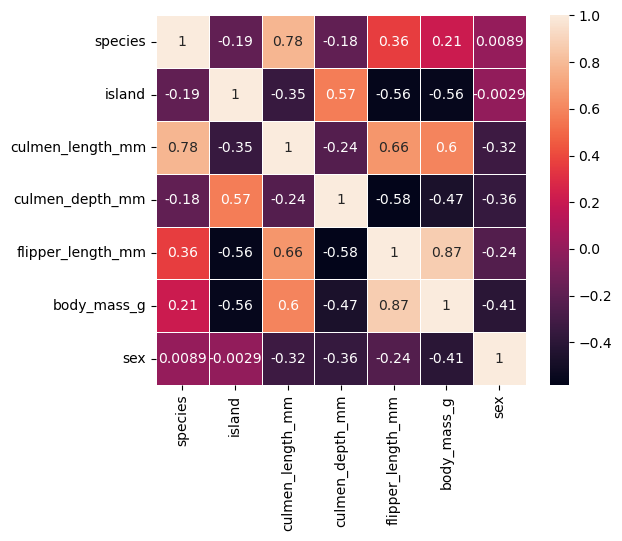

In [43]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Видим достаточно много хорошо коллерирующих признаков, можно выделить body_mass_g и flipper_length_mm, species и culmen_length_mm и др.

<h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">3. Обучение классификаторов</h1> 

#### Формирование дата-сета для обучения моделей

In [47]:
X = df.drop(columns=['species'])

In [48]:
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,3,39.1,18.7,181.0,3750.0,1
1,3,39.5,17.4,186.0,3800.0,2
2,3,40.3,18.0,195.0,3250.0,2
3,3,36.7,19.3,193.0,3450.0,2
4,3,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
336,1,47.2,13.7,214.0,4925.0,2
337,1,46.8,14.3,215.0,4850.0,2
338,1,50.4,15.7,222.0,5750.0,1
339,1,45.2,14.8,212.0,5200.0,2


In [49]:
y = df['species']

In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
336    2
337    2
338    2
339    2
340    2
Name: species, Length: 341, dtype: int64

In [51]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">3. Классификация</h1> 

##### <h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">1) KNeighborsClassifier (Классификация ближайших соседей)</h1> 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 4.25 ms


KNeighborsClassifier()

In [56]:
# Предугадываем тренировочную выборку 
knn.predict(X_test)

array([2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1], dtype=int64)

In [57]:
# измерение производительности
y_train_predict = knn.predict(X_train) 
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.8464912280701754
test accuracy:  0.8495575221238938


In [58]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

<h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">2) Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)</h1> 

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 31.2 ms
Wall time: 3.86 ms


GaussianNB()

In [62]:
# измерение производительности
gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, gnb_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_y_test_predict, normalize=True))

train accuracy:  0.9692982456140351
test accuracy:  0.9646017699115044


In [63]:
gnb_accuracy = accuracy_score(y_test, gnb_y_test_predict)

<h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">3) Random Forest Classifier (Классификатор дерева решений)</h1> 

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 141 ms
Wall time: 135 ms


In [67]:
rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, rfc_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_y_test_predict, normalize=True))

train accuracy:  1.0
test accuracy:  0.9734513274336283


In [68]:
rfc_accuracy = accuracy_score(y_test, rfc_y_test_predict)

## Метрики классификации, оценка моделей

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [71]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy]

In [72]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.849558
1,Gaussian Naive Bayes,0.964602
2,Random Forest Classifier,0.973451


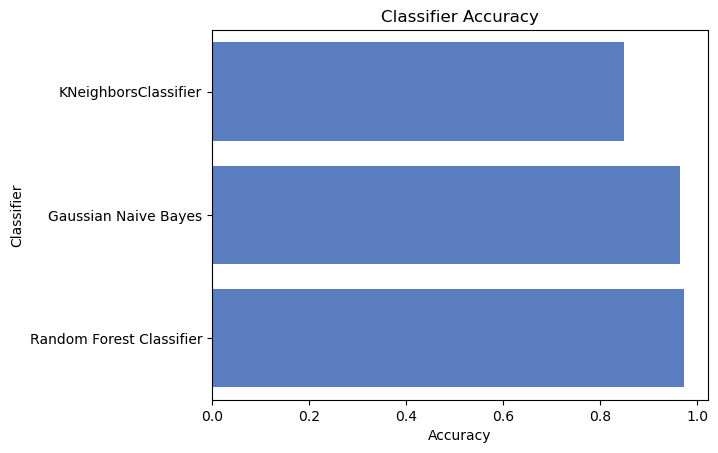

In [73]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

### F1-score

In [75]:
print('test f1_score: ', f1_score(y_test, y_test_predict, average=None))

test f1_score:  [0.85714286 0.96202532 0.5       ]


In [76]:
print('test f1_score: ', f1_score(y_test, gnb_y_test_predict, average=None))

test f1_score:  [0.96153846 1.         0.90909091]


In [77]:
print('test f1_score: ', f1_score(y_test, rfc_y_test_predict, average=None))

test f1_score:  [0.97142857 1.         0.93023256]


In [78]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           1       0.78      0.94      0.86        54
           2       0.95      0.97      0.96        39
           3       0.88      0.35      0.50        20

    accuracy                           0.85       113
   macro avg       0.87      0.76      0.77       113
weighted avg       0.86      0.85      0.83       113



##### <h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">Вывод:</h1> 

Лучше всего себя показал Random Forest Classifier, с не большим отрывом от Gaussian Naive Bayes, очевидно что много данных довольно хорошо корилируют между самбой и в целом для такого рода классификации Random Forest Classifier лучше всего себя покажет.

##### <h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">4. Кластеризация</h1> 

# Определение оптимального количества кластеров

In [83]:
X = df.iloc[:, 2:6]
y = df.iloc[:, 0]

In [84]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
336,47.2,13.7,214.0,4925.0
337,46.8,14.3,215.0,4850.0
338,50.4,15.7,222.0,5750.0
339,45.2,14.8,212.0,5200.0


In [85]:
y

0      1
1      1
2      1
3      1
4      1
      ..
336    2
337    2
338    2
339    2
340    2
Name: species, Length: 341, dtype: int64

In [86]:
# Инициализируем переменные
scores = []
values = np.arange(2, 10)

In [87]:
# Выполняем итерацию по диапазону
for num_clusters in values:
    # Обучаем модель кластеризации KMeans
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.629320763449289

Number of clusters = 3
Silhouette score = 0.5760834880502506

Number of clusters = 4
Silhouette score = 0.5540104024318652

Number of clusters = 5
Silhouette score = 0.5407320779819423

Number of clusters = 6
Silhouette score = 0.5153119212687552

Number of clusters = 7
Silhouette score = 0.5364126261247508

Number of clusters = 8
Silhouette score = 0.5356675446300447

Number of clusters = 9
Silhouette score = 0.5388820338049305



Optimal number of clusters = 2


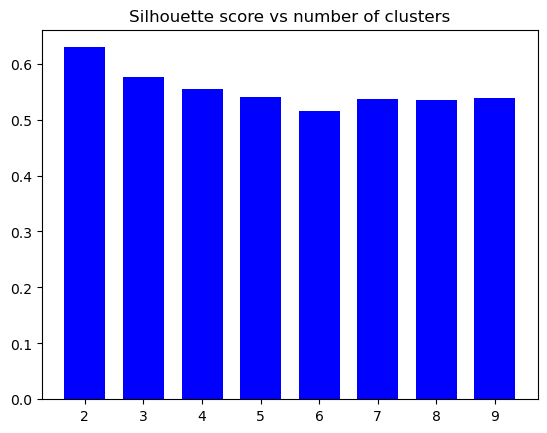

In [88]:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

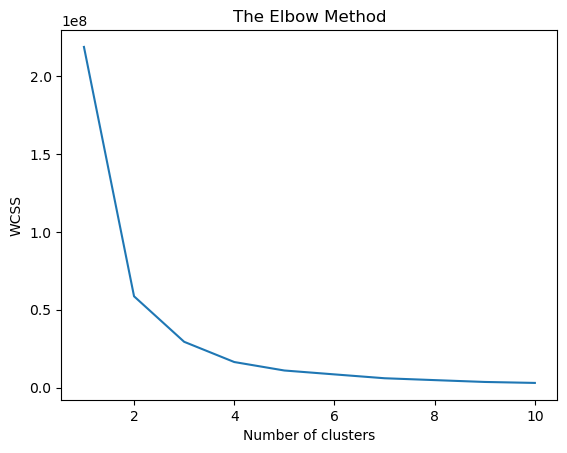

In [89]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Метод главных компонент

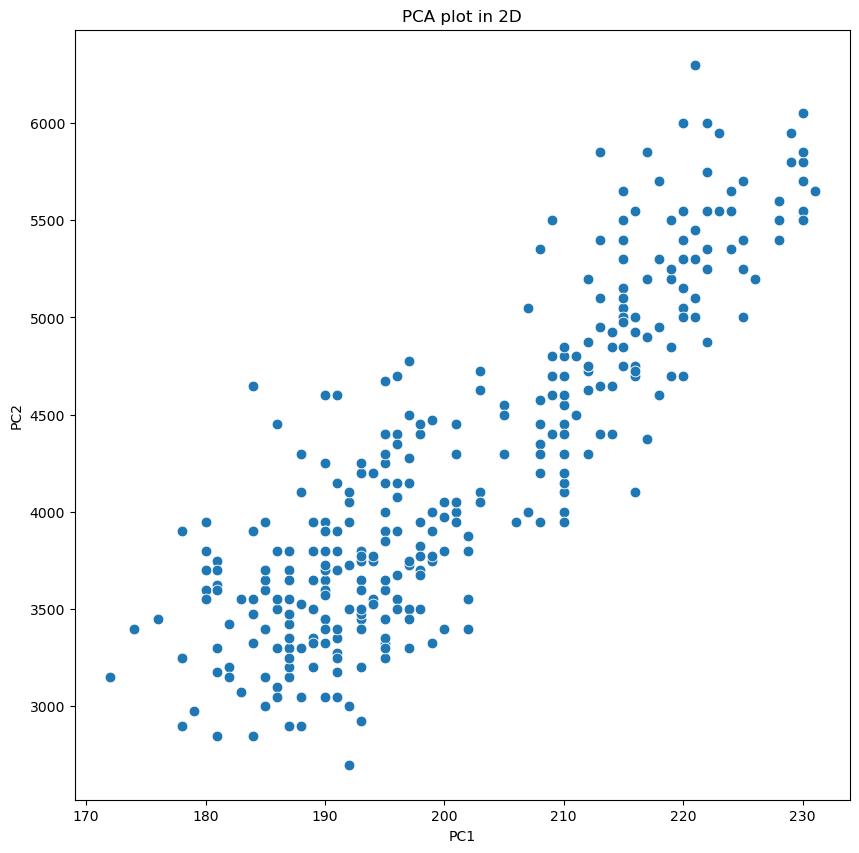

In [116]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = X.iloc[:,2], 
                y = X.iloc[:,3], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [118]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

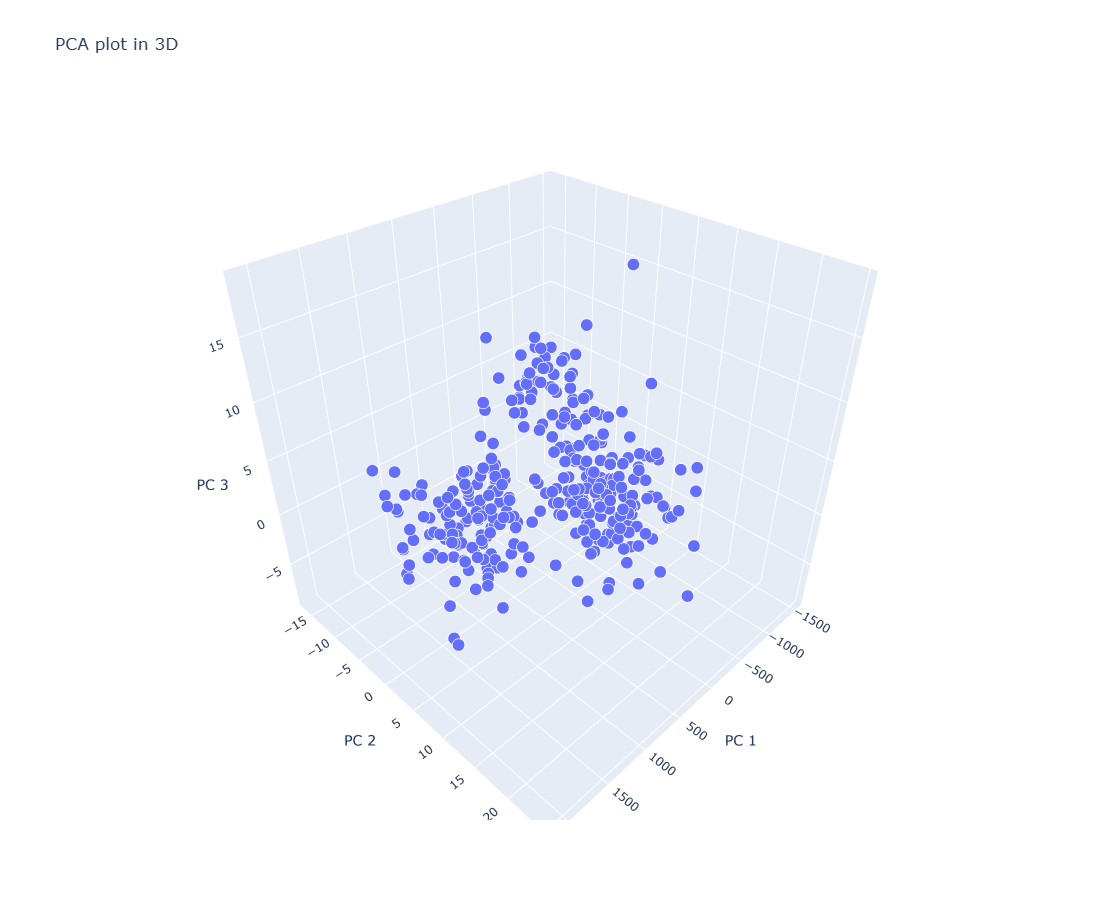

In [120]:
PCAplot3D(X)

# Обучение класторизации

In [123]:
def showMetric(X, metrica):
    ch_score = calinski_harabasz_score(X, metrica)
    sil_score = silhouette_score(X, metrica)
    db_score = davies_bouldin_score(X, metrica)
    return [ch_score, sil_score, db_score]

<h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">1) K-Means</h1> 

In [125]:
pca = PCA(n_components=2)


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

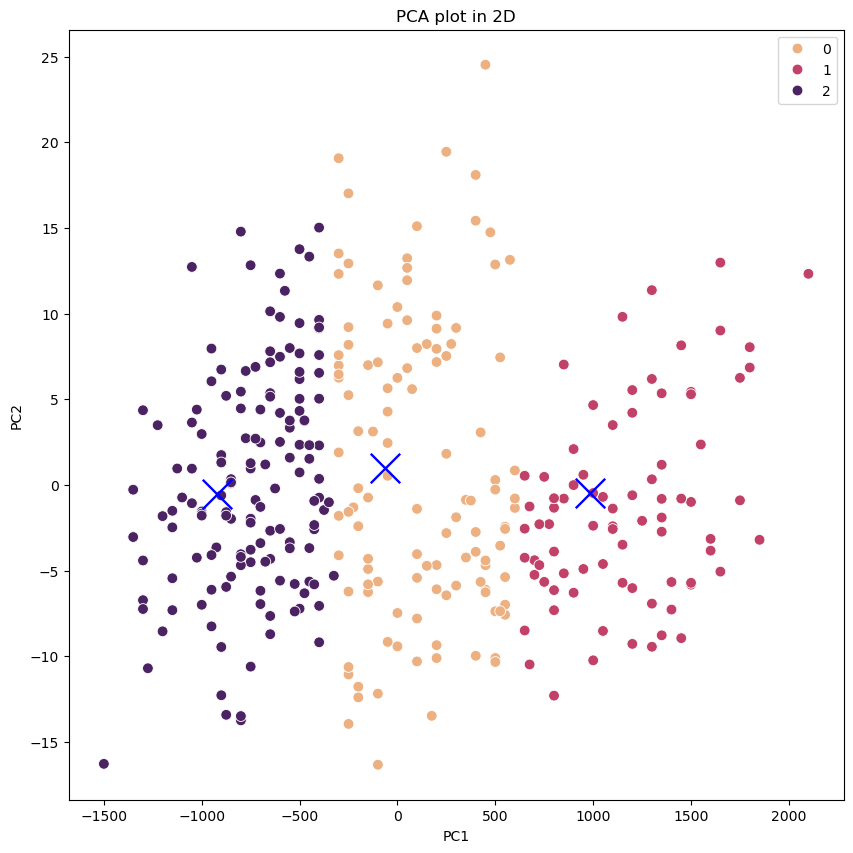

In [127]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

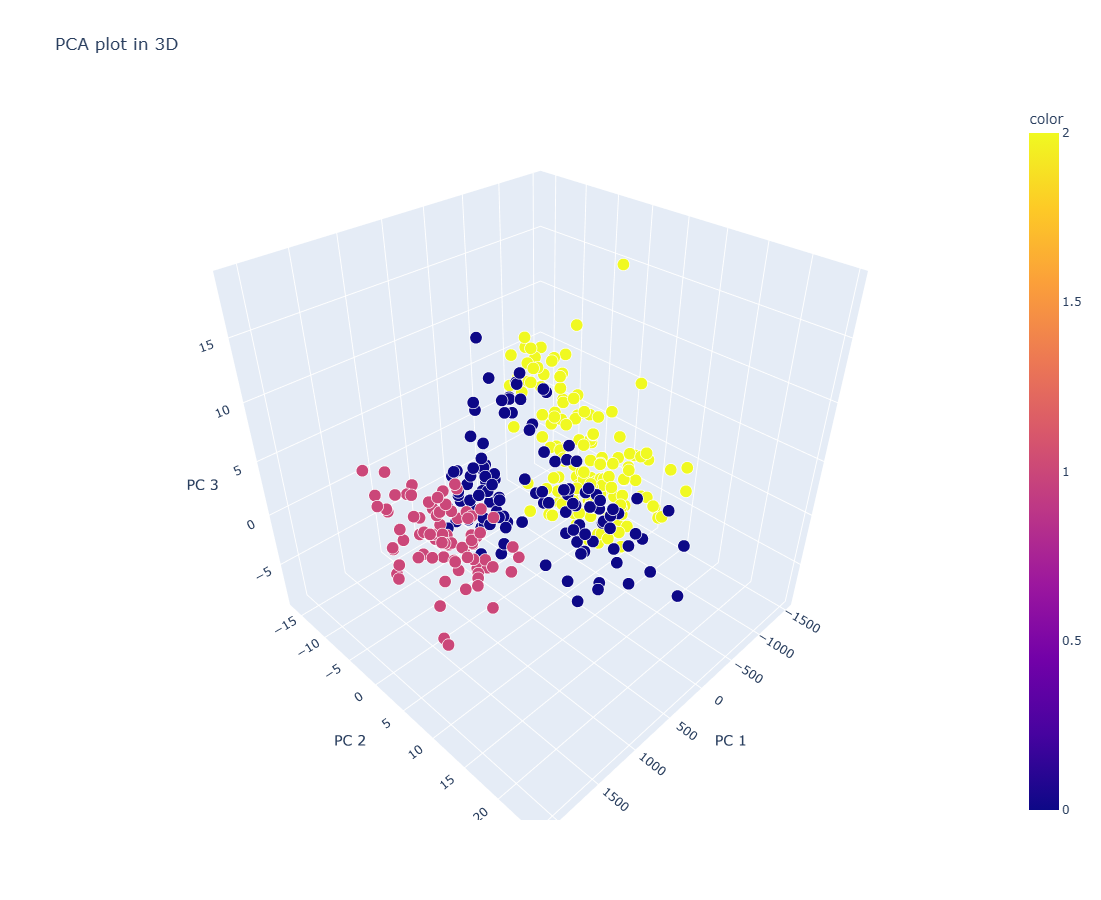

In [129]:
PCAplot3D(X, pred_k)

In [131]:
print("K-Means метрики")
print()
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, kmeans.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, kmeans.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, kmeans.labels_)))

K-Means метрики

Calinski_harabasz_score: 1088.8766957151254
Silhouette_score: 0.5599044768721616
Davies_bouldin_score: 0.5373995989050891


<h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">2) Agglomerative Clustering by Ward </h1> 

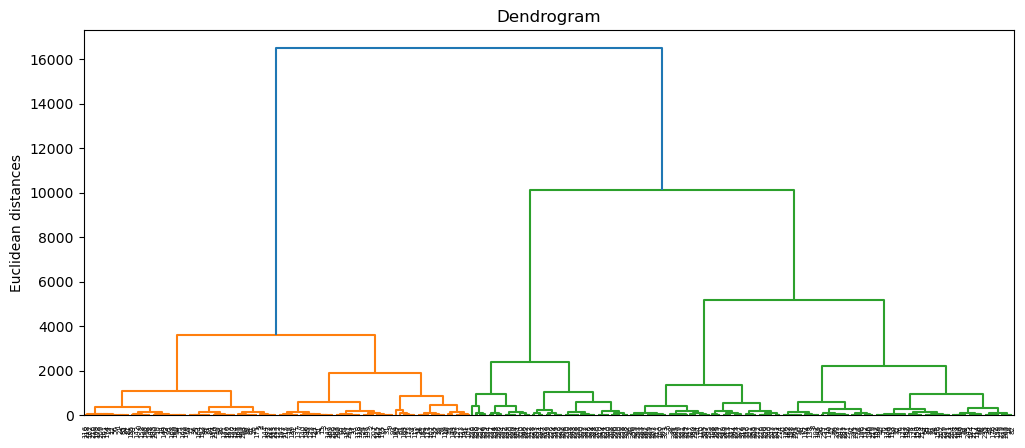

In [134]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [136]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

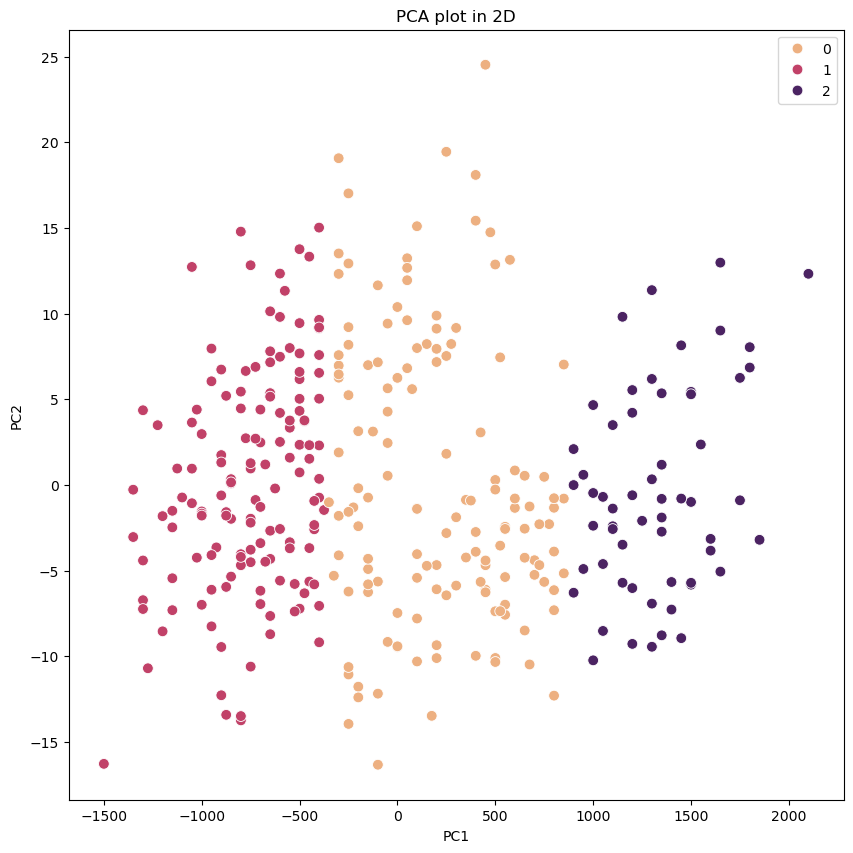

In [138]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

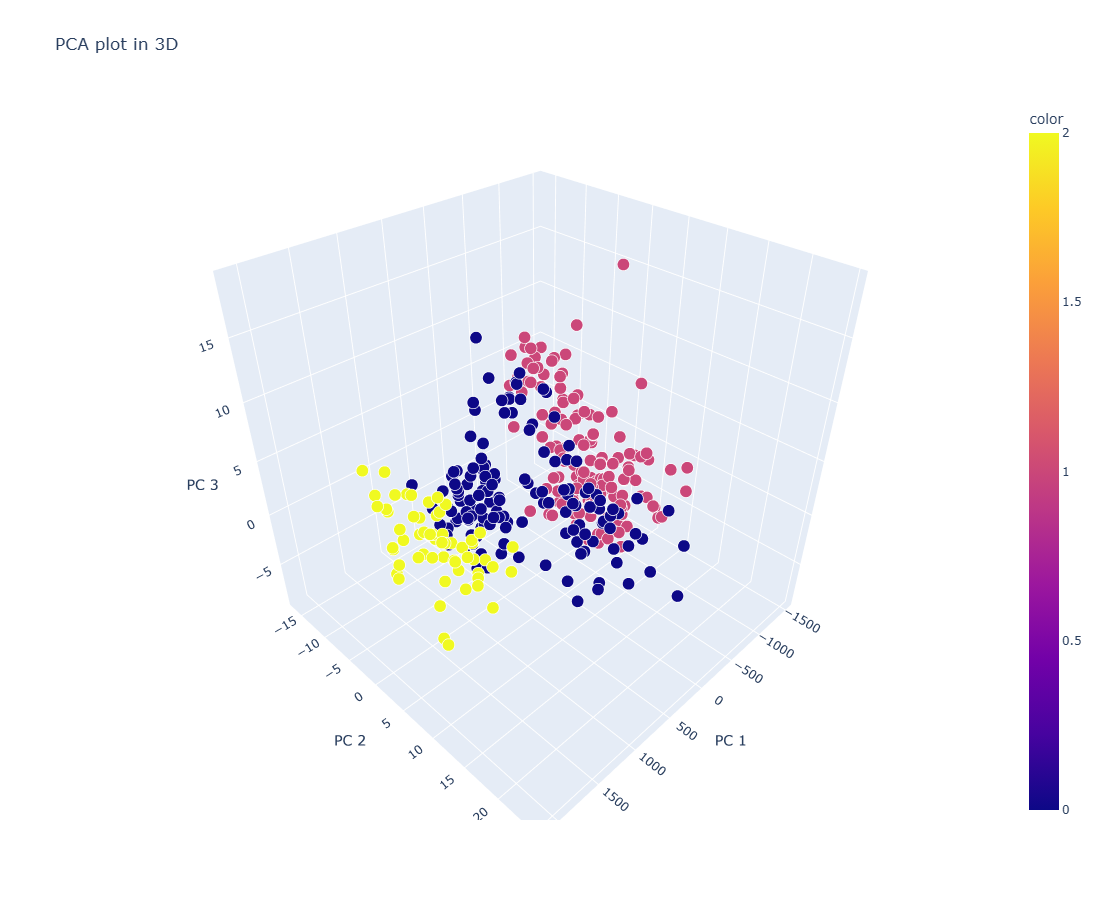

In [140]:
PCAplot3D(X, pred_ward)

In [142]:
print("AgglomerativeClustering метрики")
print()
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, clustering_ward.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, clustering_ward.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, clustering_ward.labels_)))

AgglomerativeClustering метрики

Calinski_harabasz_score: 996.5357254011868
Silhouette_score: 0.5506002385659624
Davies_bouldin_score: 0.5240283097545412


<h1 id="aa" align="left" style="color:white;background:#009B00;padding:18px;border-radius:15px 15px; font-family:newtimeroman;">3) Spectral Clustering</h1> 

In [168]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

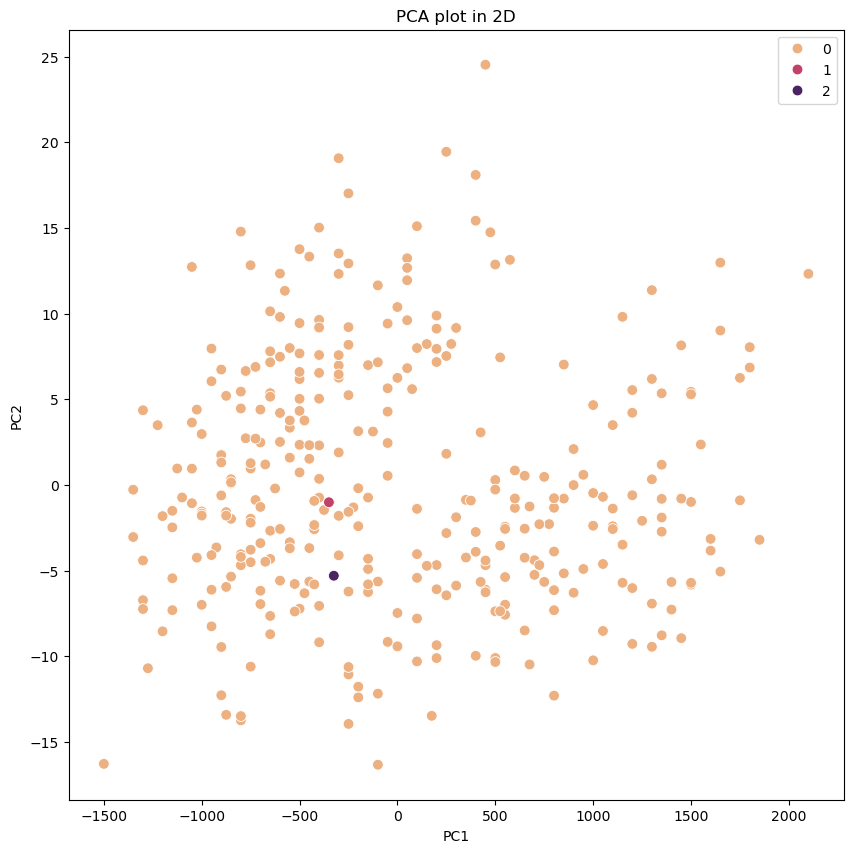

In [169]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

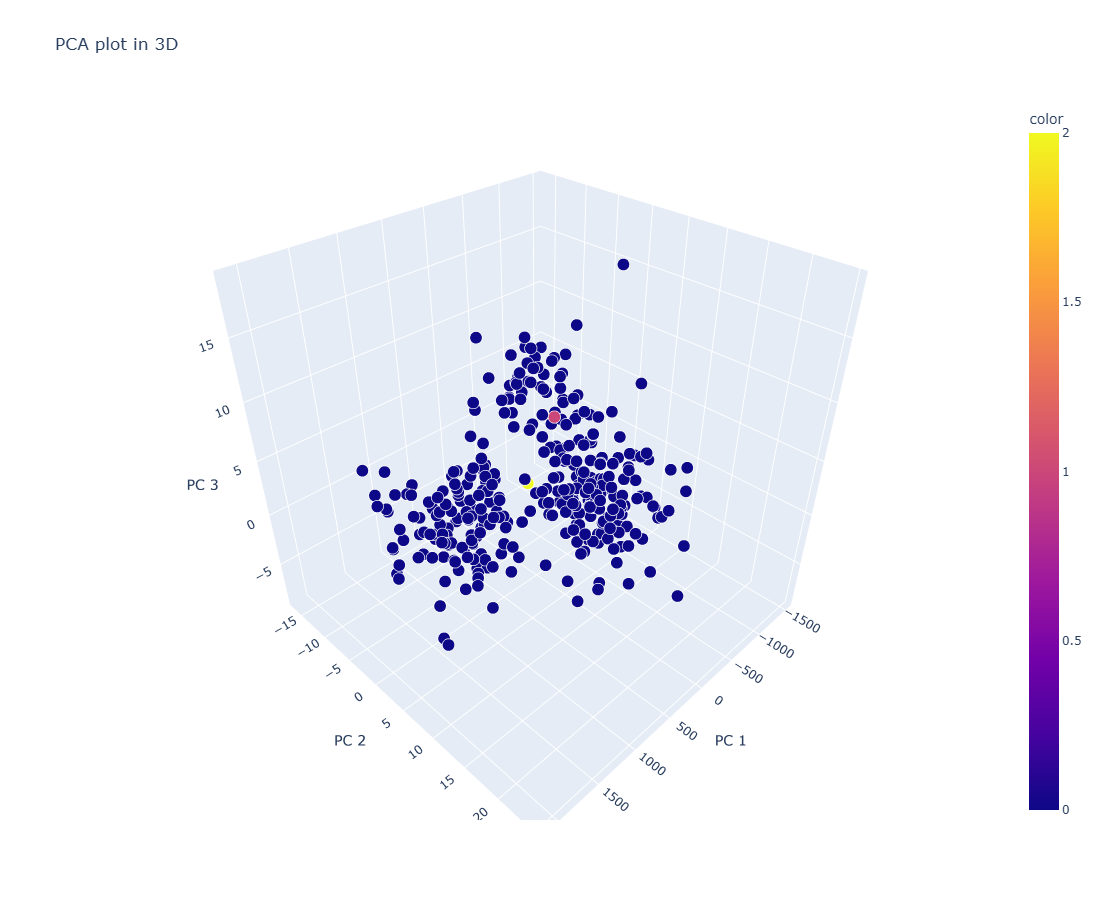

In [170]:
PCAplot3D(X, pred_sp)

In [171]:
print("SpectralClustering метрики")
print()
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, clustering_sp.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, clustering_sp.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, clustering_sp.labels_)))

SpectralClustering метрики

Calinski_harabasz_score: 0.1771344135816749
Silhouette_score: -0.35143227975192487
Davies_bouldin_score: 2.0276712693668575


# RAND_SCORE

In [152]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 341  предсказано верно \n\n\n\n".format(rs_k, rs_k * 341))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 341 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 341))


print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 341 предсказано верно \n".format(rs_sp, rs_sp * 341))


K-Means
_____________________________________________

 rand_score = 0.6827669484215974 

 232.8235294117647 из 341  предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.6460238054165948 

 220.2941176470588 из 341 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.3662066586165258 

 124.87647058823529 из 341 предсказано верно 



### Общий вывод 
Лучше всего себя показала K-Means, потому что данные были более менее одинакового размера, имели сферическую форму кластеров, были плотно распределены, Spectral Clustering наоборот показал себя хуже всего, т.к он подходит больше для данных которые не имееют выпуклые кластеры, а также он должен иметь более тонкую настройку.